In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#house_df = pd.read_csv('data/other-data/Metro_ZORI_AllHomesPlusMultifamily_Smoothed.csv')
house_df = pd.read_csv('data/other-data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
del house_df['RegionID'], house_df['SizeRank'], house_df['RegionType'], house_df['StateName']
house_df.set_index('RegionName',drop=True,inplace=True)
house_df = house_df.T
house_df.index = pd.to_datetime(house_df.index)

In [4]:
house_df.head()
#pd.to_datetime(house_df.index)

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Winnemucca, NV","Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK"
1996-01-31,106811.0,187591.0,186111.0,163099.0,111373.0,120570.0,108086.0,179253.0,110764.0,120401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61884.0,NaN,NaN,NaN
1996-02-29,106838.0,187153.0,186371.0,162799.0,111437.0,120415.0,108161.0,179028.0,110895.0,120630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62113.0,NaN,NaN,NaN
1996-03-31,106888.0,186875.0,186390.0,162404.0,111596.0,120275.0,108169.0,178897.0,111035.0,120851.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62354.0,NaN,NaN,NaN
1996-04-30,107014.0,186342.0,186499.0,161955.0,111914.0,120032.0,108315.0,178622.0,111285.0,121341.0,...,NaN,NaN,NaN,NaN,NaN,NaN,62824.0,NaN,NaN,NaN
1996-05-31,107156.0,186025.0,186473.0,161353.0,112257.0,119868.0,108452.0,178502.0,111502.0,121823.0,...,NaN,NaN,NaN,NaN,NaN,NaN,63158.0,NaN,NaN,NaN


In [21]:
house_df = house_df.rolling(12,center=True).mean()

In [10]:
house_df['Year'] = house_df.index.year
house_df.groupby(house_df['Year']).mean()

RegionName,United States,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL","Atlanta, GA",...,"Sweetwater, TX","Andrews, TX","Zapata, TX","Vermillion, SD","Lamesa, TX","Craig, CO","Pecos, TX","Vernon, TX","Ketchikan, AK",Month
Year,,,,,,,,,,,,,,,,,,,,,
1996,108022.875000,186124.458333,186287.430556,163285.666667,113160.875000,120023.069444,108883.263889,178287.083333,112307.847222,123718.652778,...,NaN,NaN,NaN,NaN,NaN,64554.680556,NaN,NaN,NaN,6.5
1997,110444.576389,189474.416667,188139.208333,161630.076389,115036.777778,121218.979167,109940.763889,178192.854167,113921.180556,128146.743056,...,NaN,NaN,NaN,NaN,NaN,67538.451389,NaN,NaN,NaN,6.5
1998,115105.805556,197289.569444,201782.250000,153042.583333,118343.812500,123214.652778,113219.805556,180031.659722,117115.694444,135597.798611,...,NaN,NaN,NaN,NaN,NaN,74510.159722,NaN,NaN,NaN,6.5
1999,121271.201389,211760.569444,221011.993056,163800.326389,123881.250000,126532.937500,118372.618056,185880.708333,121281.902778,144526.812500,...,NaN,NaN,NaN,NaN,NaN,83133.965278,NaN,NaN,NaN,6.5
2000,129380.597222,235894.312500,243509.284722,175991.027778,129583.965278,132800.416667,123199.381944,198063.618056,127917.791667,155472.604167,...,NaN,NaN,NaN,NaN,NaN,91606.930556,NaN,NaN,NaN,6.5
2001,138690.097222,264844.152778,270579.770833,190539.243056,131954.986111,141036.708333,124884.375000,219231.354167,140769.708333,166399.284722,...,NaN,NaN,NaN,NaN,NaN,98457.770833,NaN,NaN,189257.250000,6.5
2002,148273.236111,298412.715278,308341.944444,205162.055556,135321.256944,153427.597222,128006.354167,248974.548611,160197.145833,174100.201389,...,NaN,NaN,NaN,NaN,NaN,103931.701389,NaN,NaN,189928.944444,6.5
2003,159492.965278,341066.423611,367307.715278,220129.159722,139337.916667,172114.423611,132260.694444,285856.312500,183894.416667,178786.263889,...,NaN,NaN,NaN,NaN,NaN,107852.069444,NaN,NaN,197089.375000,6.5
2004,174453.326389,385452.548611,457943.548611,236808.472222,146429.118056,195583.145833,139298.430556,337943.131944,215817.631944,183099.166667,...,NaN,NaN,NaN,NaN,NaN,113638.541667,NaN,NaN,213455.868056,6.5


In [22]:
house_ppc_df = house_df.diff()/house_df.shift()*100
house_ppc_df = house_ppc_df.drop( house_ppc_df.index[0] )

<AxesSubplot:>

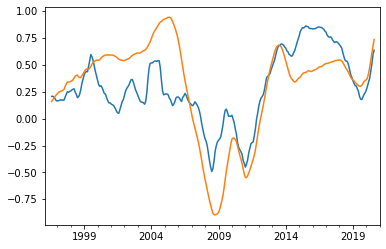

In [23]:
house_ppc_df[house_ppc_df.columns[4]].plot()
house_ppc_df[house_ppc_df.columns[0]].plot()

<AxesSubplot:>

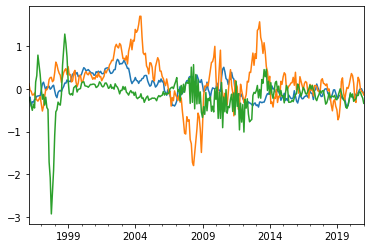

In [41]:
#house_ppc_df[house_ppc_df.columns[4]].plot()
(house_ppc_df[house_ppc_df.columns[1]]-house_ppc_df[house_ppc_df.columns[0]] ).plot()
(house_ppc_df[house_ppc_df.columns[2]]-house_ppc_df[house_ppc_df.columns[0]] ).plot()
(house_ppc_df[house_ppc_df.columns[3]]-house_ppc_df[house_ppc_df.columns[0]] ).plot()

In [6]:
df = pd.read_csv('data/other-data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,...,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31
0,102001,0,United States,Country,NaN,106811.0,106838.0,106888.0,107014.0,107156.0,...,250069.0,251258.0,252506.0,254019.0,255964.0,258235.0,260729.0,263427.0,266222.0,269039.0
1,394913,1,"New York, NY",Msa,NY,187591.0,187153.0,186875.0,186342.0,186025.0,...,483751.0,485191.0,486992.0,489417.0,492642.0,496858.0,501651.0,506833.0,511880.0,516732.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,186111.0,186371.0,186390.0,186499.0,186473.0,...,698120.0,699783.0,701018.0,705448.0,712728.0,720482.0,727461.0,734522.0,741757.0,748532.0
3,394463,3,"Chicago, IL",Msa,IL,163099.0,162799.0,162404.0,161955.0,161353.0,...,245195.0,245715.0,246350.0,247476.0,248977.0,250996.0,253227.0,255446.0,257610.0,259459.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111373.0,111437.0,111596.0,111914.0,112257.0,...,256755.0,257898.0,259226.0,260751.0,262469.0,264207.0,266483.0,268773.0,271372.0,273348.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,394767,929,"Lamesa, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,74888.0,75130.0,75441.0,75725.0,76039.0,76385.0,76733.0,77319.0,78015.0,78762.0
909,753874,930,"Craig, CO",Msa,CO,61884.0,62113.0,62354.0,62824.0,63158.0,...,191181.0,191259.0,191465.0,191633.0,191837.0,192061.0,192424.0,193341.0,194323.0,195374.0
910,394968,931,"Pecos, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,134245.0,134927.0,135804.0,136325.0,136118.0,134957.0,133241.0,131749.0,130777.0,129578.0
911,395188,932,"Vernon, TX",Msa,TX,NaN,NaN,NaN,NaN,NaN,...,68440.0,68423.0,68364.0,68360.0,68365.0,68420.0,68363.0,68378.0,68339.0,68432.0


In [8]:
df['RegionType'].unique()

array(['Country', 'Msa'], dtype=object)